In [2]:
#importing the required libraries :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.stats.api as sms
from scipy import stats
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
#ignore the warnings
import warnings 
warnings.filterwarnings('ignore')


# Data Understanding

In [3]:
# read the train data set 
df = pd.read_csv('train.csv',index_col='Unnamed: 0') 
#displaying all the columns
pd.set_option('display.max_columns' ,100)
df.head()
#checking the shape of the dataset 
df.shape 

(103904, 24)

In [4]:
# read the test data set 
df_test = pd.read_csv('test.csv',index_col='Unnamed: 0')

In [5]:
#checking the top 5 data points 
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
#checking the 5-point summary of the dataset 
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
#checking the datatypes and the null values in the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

# Data preparation

## Identifying The Null Values

In [8]:
#checking the amount of null values present in the dataframe
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [9]:
#checking the amount of null values present in the test dataset
df_test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

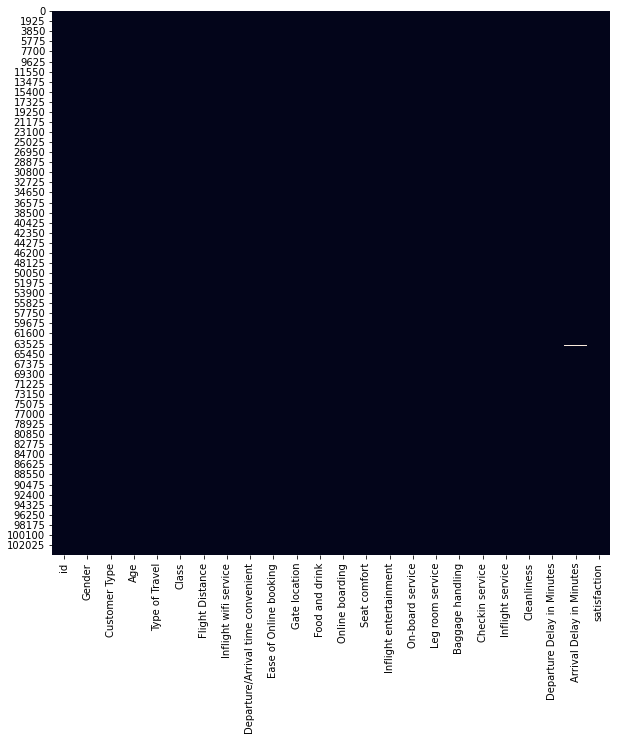

In [10]:
#checking the null values with the help of a heat map 
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [11]:
#checking the percentage of null values in the given dataset 
(df.isnull().sum()/len(df))*100

id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

In [12]:
# replacing the null values with zero
df.fillna(0,inplace = True)

In [13]:
# replacing the test dataset null values with zero
df_test.fillna(0,inplace = True)

In [14]:
#checking the amount of null values in the dataset 
(df.isnull().sum()/len(df))*100

id                                   0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction                         0.0
dtype: float64

In [15]:
#dropping the id column 
df = df.drop(columns='id')

In [16]:
#dropping the id column from test dataset
df_test = df_test.drop(columns='id')

In [17]:
#checking the top-5 data points:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


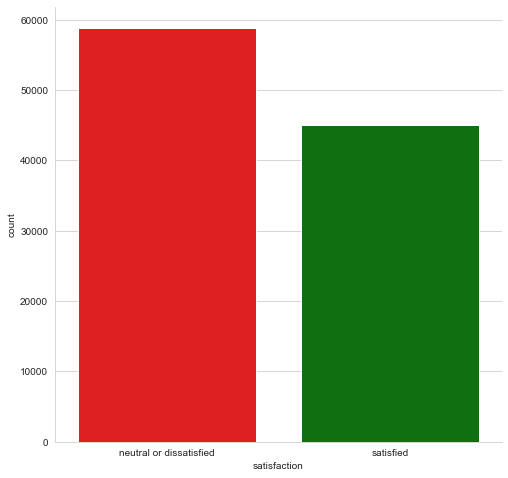

In [18]:
#changes the plot size 
plt.figure(figsize=(8,8))
#white grid background
sns.set_style('whitegrid')
#count plot for the column 'satisfaction'
sns.countplot(df['satisfaction'],palette=['r','g'])
#removes the spines from the right and upper portion of the plot by default
sns.despine()

plt.show()

**Interpretation:** it can be seen from the data that the target column  *satisfaction* is not completely balance but yet sufficient enough to 
make predictions out of it 

In [19]:
#checking the valuecounts for the column 'satisfaction'
df['satisfaction'].value_counts(normalize=True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

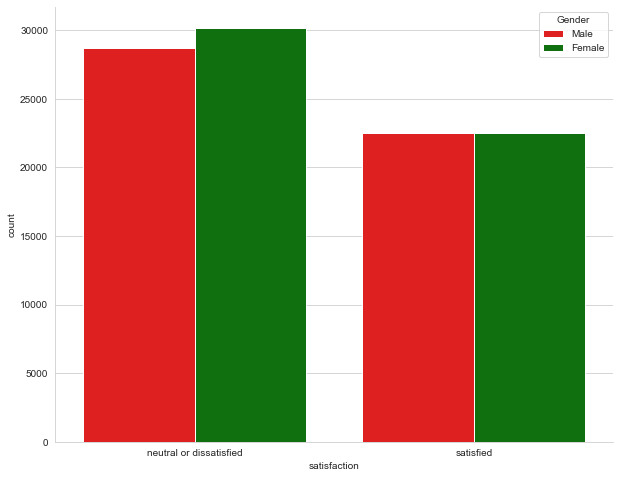

In [20]:
#changes the plot size 
plt.figure(figsize=(10,8))
#count plot for the column 'satisfaction' based on gender 
sns.countplot(df['satisfaction'],hue=df['Gender'],palette=['r','g'])
#removes the spines from the right and upper portion of the plot by default
sns.despine()
plt.show()

**Interpretation:** this plot is used to check wether the *satisfaction* varies with respect to *gender* just to check wether if there is any underlying issues related to gender biases , and it looks like the satisfaction level for both the genders is almost the same.

### Distribution Of Continuous Variables

In [21]:
#list of continuous variables:
l=['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

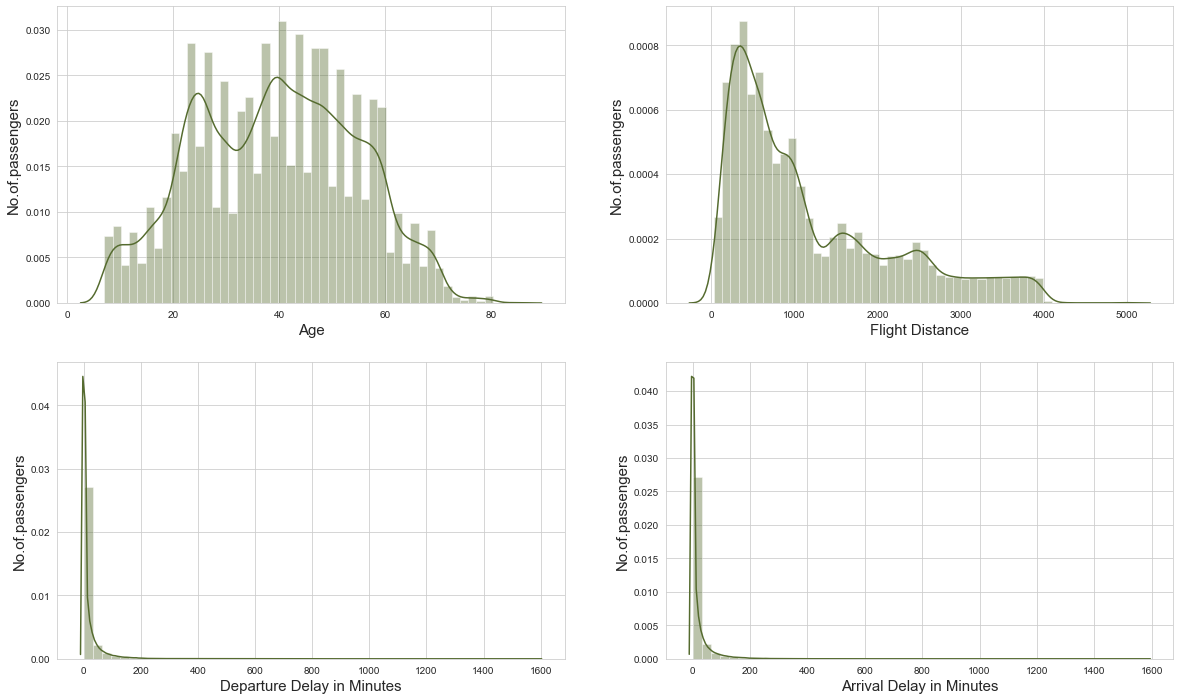

In [22]:
#changes the plot size 
plt.figure(figsize=(20,12))
sns.despine()
#for loop to create subplots to find the distribution of the univariate variables
for i,j in enumerate(l):
    plt.subplot(2,2,i+1)
    sns.distplot(df[j],hist=True,color='darkolivegreen')
    plt.xlabel(j,fontsize=15)
    plt.ylabel('No.of.passengers',fontsize=15)
plt.show()

**Interpretation:**

**plot 1** : from the plot Age vs No of passengers we can see that although its not a perfect normal distribution, the distribution of age is partially normal, and the major age category that travel ranges between 20 to 60

**plot2** :from the plot flight distance vs no of passengers it can be seen that the data is right skewed and the mojority of flights travel a distance which ranges between 100 miles to 1000 miles, starting from 31 miles (ie) from alaska to petersburg

**plot 3 and 4** : It can be seen that the data is heavily right skewed, in which most of the delay in mins ranges between 10 to 
100 which is fairly understandable as the airline companies look to start the flight without any delays


#map function to change the names of the customer type :
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':'Reliable','disloyal Customer':'Unreliable'})

In [23]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [24]:
# list of categorical variables :
l2 = ['Customer Type','Type of Travel','Class']

In [25]:
# We replace the Customer type using map function, because here Loyal customers are reliable and disloyal customer are unreliable
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':'Reliable','disloyal Customer':'Unreliable'})

In [26]:
# We replace the Customer type using map function also in test dataset, because here Loyal customers are reliable and disloyal customer are unreliable
df_test['Customer Type'] = df_test['Customer Type'].map({'Loyal Customer':'Reliable','disloyal Customer':'Unreliable'})

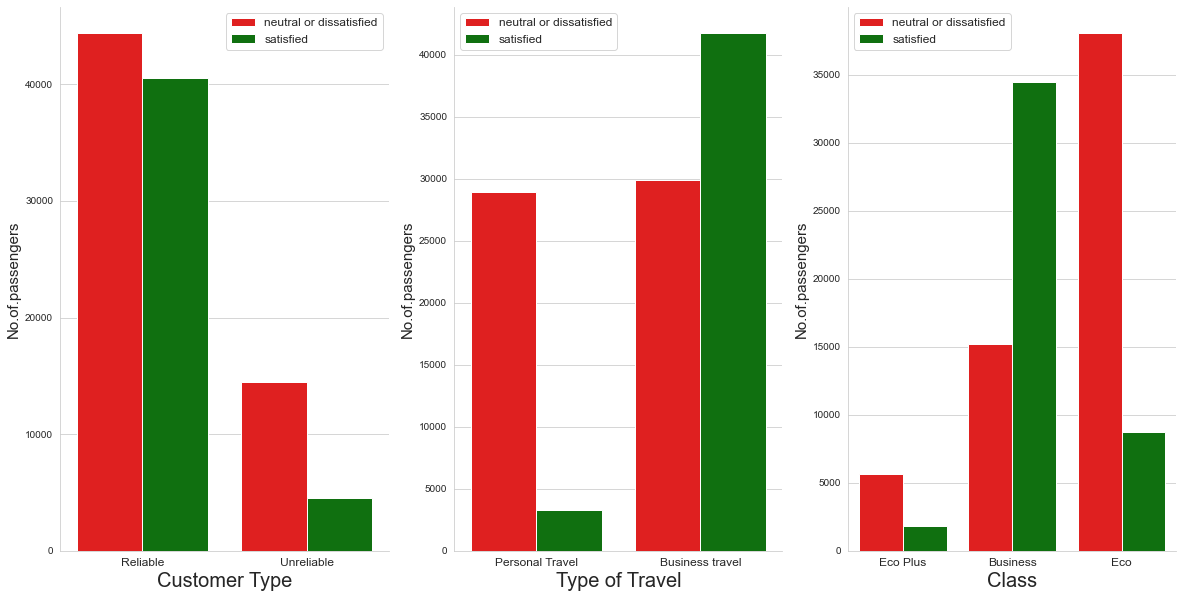

In [27]:
#increase the figure size 
plt.figure(figsize=(20,10))
# initiating a for lop to create subplot 
for i,j in enumerate(l2):
#to create a 1 row 3 column subplot    
    plt.subplot(1,3,i+1)
    sns.countplot(df[j],hue=df['satisfaction'],palette=['r','g'])
#removes the spines from the right and upper portion of the plot by default
    sns.despine()
#assigning labels to x and y axis 
    plt.xlabel(j,fontsize=20)
    plt.xticks(fontsize='large')
    plt.ylabel('No.of.passengers',fontsize=15)
    plt.legend(fontsize='large')
plt.show()

**Interpretation:**

**plot1:** we can be seen that the number of returning/reliable customers are more when compared to the number of non reliable customers, and the number of dissatisfied customers seem to high within the unreliable customers and therre exists a kind of balanced within the reliable customers 

**plot2:** we can see that business travel people are highly satisfied with the services, when compared to the personal travel
there is a clear disparity when satisfaction is compared between the type of travelers, which clearly depics some underlying issues in services based on the type of travelers 

**plot3** here we can see that when compared within classes , there is a huge difference in satisfaction within the three classes, and business class people seem to be the most satisfied when compared to eco and eco plus class passengers, which is undertandable compared to the amount of services offered to the business class people in the airlines, although such high variance within the classes can be balanced rather than being over biased to one particular section of the passengers to a considerable amount 


### Ratings Column

In [28]:
#fetching the columns which has ratings in it :
l3 = df.iloc[:,6:20].columns
l3

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

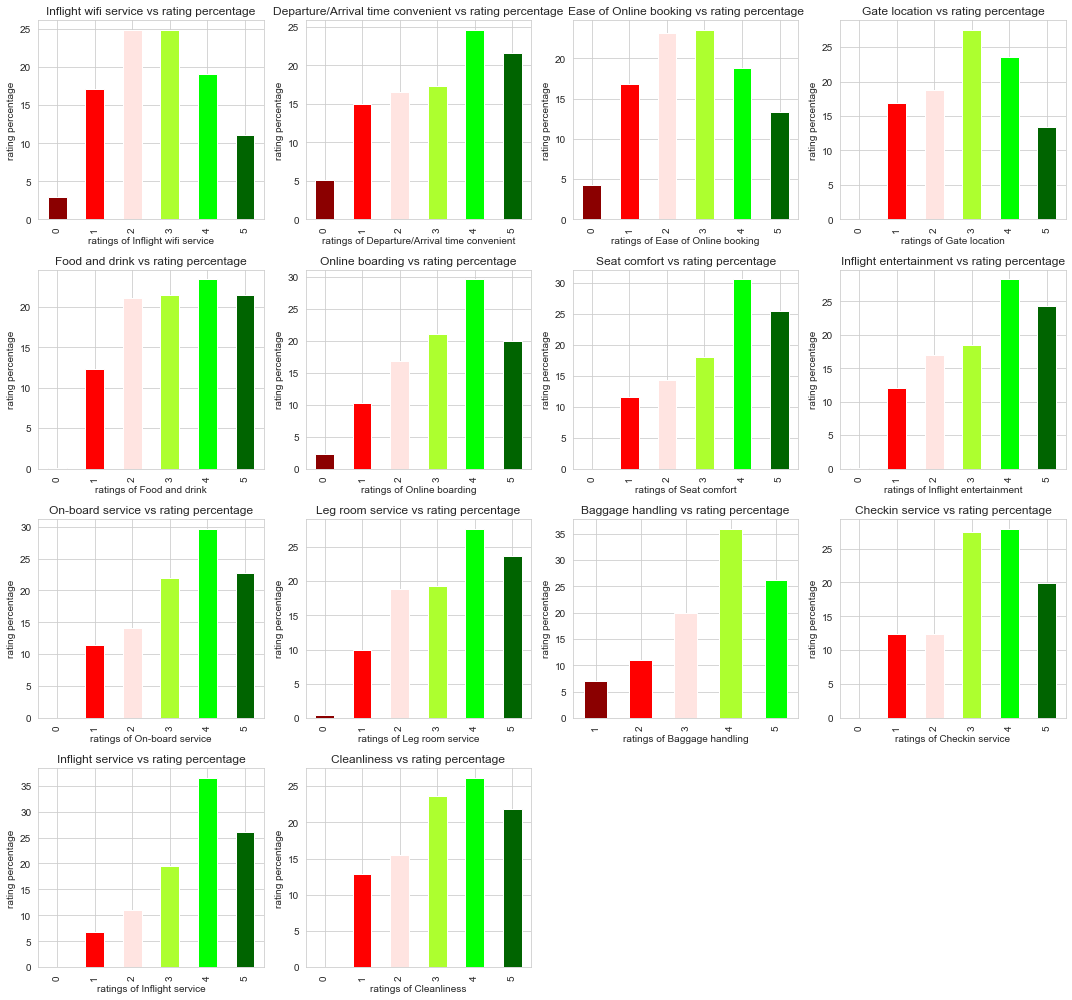

In [29]:


#increases the size of the subplot:
plt.figure(figsize=(15,14))
#for loop to plot the subplots:
for i,j in enumerate(l3):
    plt.subplot(4,4,i+1)
    (df[j].value_counts(normalize=True)*100).sort_index(ascending = True).plot(kind='bar',color=['darkred','red','mistyrose','greenyellow','lime','darkgreen'])
    plt.xlabel(f'ratings of {l3[i]}')
    plt.ylabel('rating percentage')
    plt.title(f'{l3[i]} vs rating percentage')
#automatically adjusts subplot params so that the subplots fits in to the figure area
plt.tight_layout()
plt.show()

**Interpretation:**: from the plots above we can say that the airline performs better in:
*inflight services*

*Baggage handling*

*leg room services*

*on board services*

*seat comfort*

*inflight entertainment*


and also services could be improved in these areas:

*food and drinks*

*gate location* perhaps i changes cant be made over here

*ease of online booking* 

*in flight wifi services* 

thus a simple count plot could give us so much insights about our dataset




###  Box plot to check for outliers

In [30]:
l4 = ['Age','Departure Delay in Minutes','Arrival Delay in Minutes','Flight Distance']

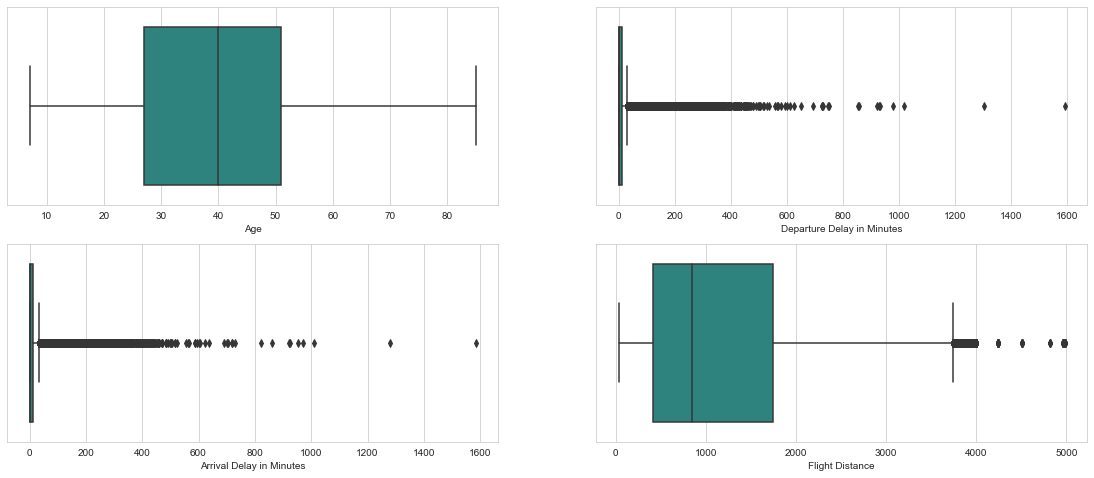

In [31]:
plt.figure(figsize=(8,8))
for x,y in enumerate(l4):
    plt.subplot(2,2,x+1)
    sns.boxplot(df[y],palette='viridis')
#adjust the horizontal distance between the two subplots    
    plt.subplots_adjust(right=2)
    plt.xlabel(y)
#automatically adjusts subplot params so that the subplots fits in to the figure area
plt.show()

   

**Interpretation:** huge amount of outliers are present in Departure Delay in Minutes and Arrival Delay in Minutes is huge which is understandable as most of the flights take off within the prescribed time and since it being a continous variable we can see huge amount of outliers 

majority of flights travel with a distance range of 500 to 1800 miles and few outliers can be found which indicates these are long distance flights

majority of passengers vary withing the age group of 28 - 52

In [32]:
# to check the skewness of the data :
skewed=df.skew()
skewed

Age                                 -0.004516
Flight Distance                      1.109466
Inflight wifi service                0.040408
Departure/Arrival time convenient   -0.334399
Ease of Online booking              -0.018294
Gate location                       -0.058889
Food and drink                      -0.151279
Online boarding                     -0.453852
Seat comfort                        -0.482775
Inflight entertainment              -0.365131
On-board service                    -0.420031
Leg room service                    -0.350231
Baggage handling                    -0.677040
Checkin service                     -0.364982
Inflight service                    -0.690314
Cleanliness                         -0.300074
Departure Delay in Minutes           6.733980
Arrival Delay in Minutes             6.605288
dtype: float64

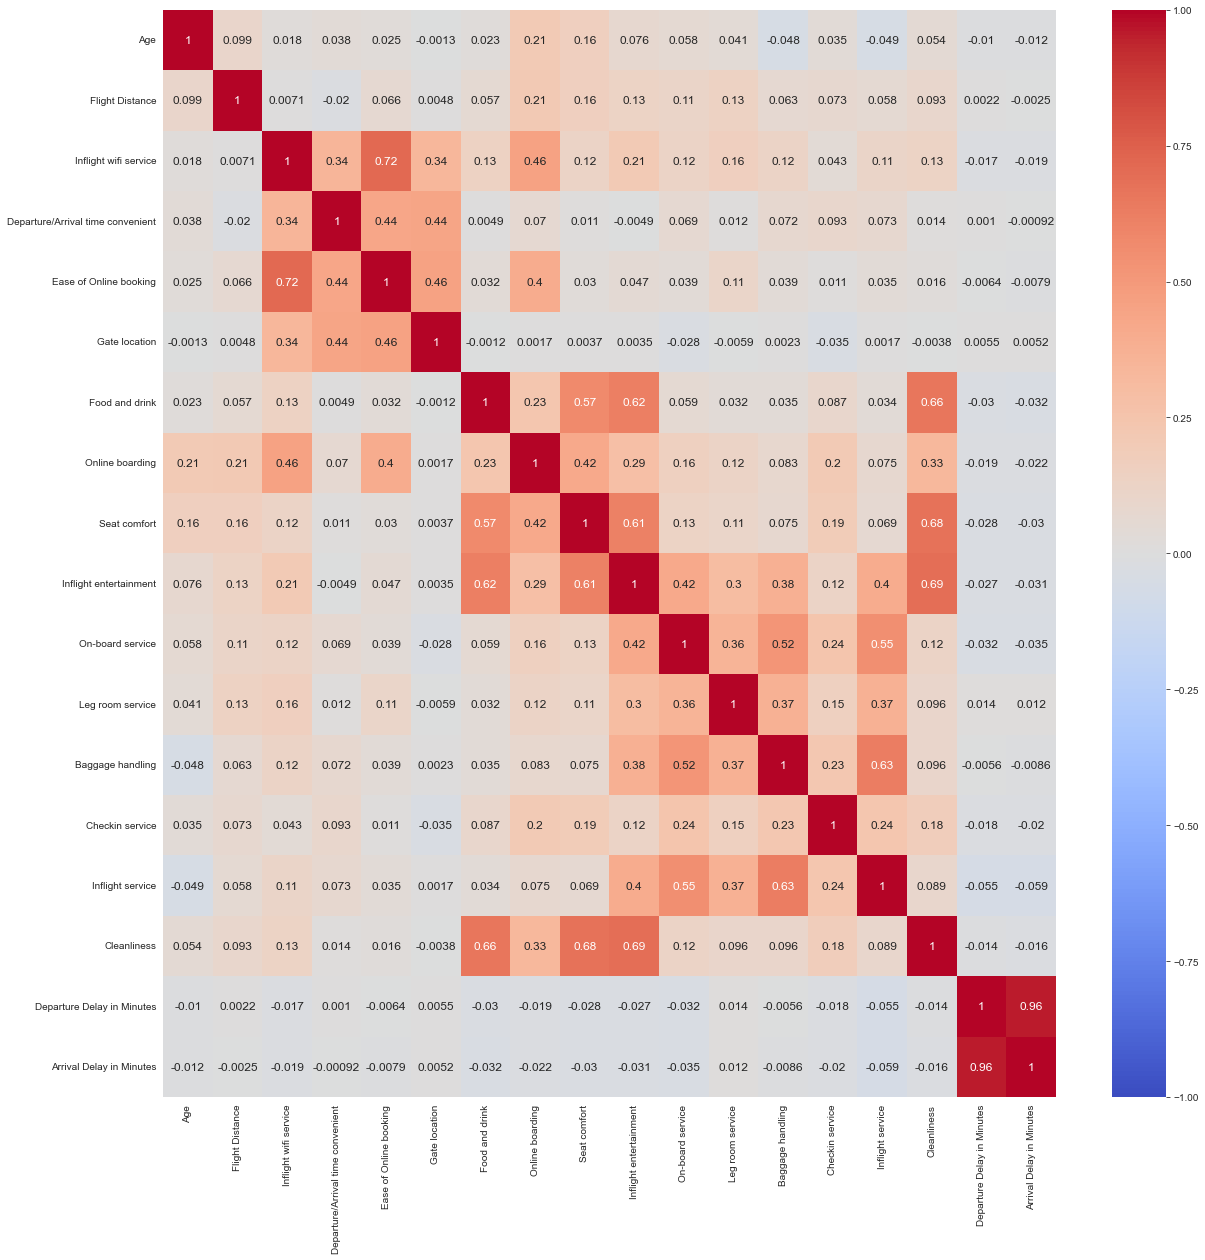

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':12},cmap='coolwarm',vmax=1,vmin=-1)
plt.show()

**Interpretation:** high amount of correlation is present between 'Departure Delay in Minutes' and 'Arrival Delay in Minutes'

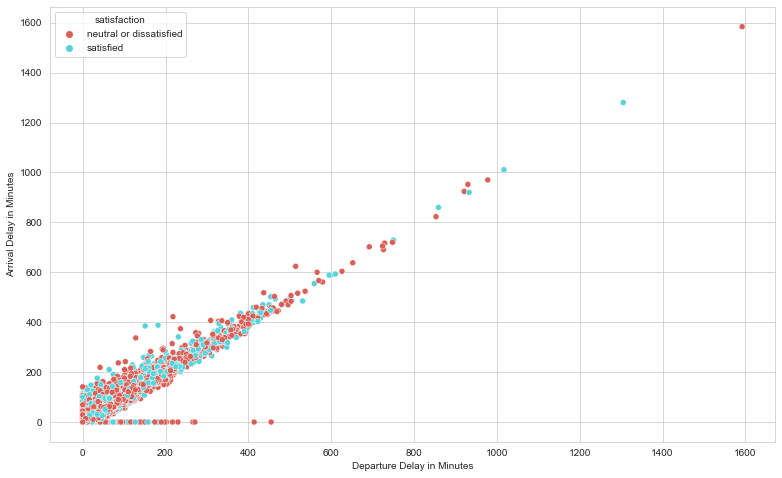

In [34]:
#increases the size of the figure:
plt.figure(figsize=(13,8))
#drawing a scatter plot 
sns.scatterplot(df['Departure Delay in Minutes'],df['Arrival Delay in Minutes'],hue=df['satisfaction'],palette='hls')
plt.show()

**Interpretation:** it can be seen that as there is a delay in departure when there is  a delay in arrival. which shows a strong positive correlation between the departure and arrival, but based on this alone the satifaction coudnt be predicted as they seem to be clustered all over 



### Distribution of Categorical Variables

In [35]:
l5=['Gender','Customer Type','Type of Travel','Class']

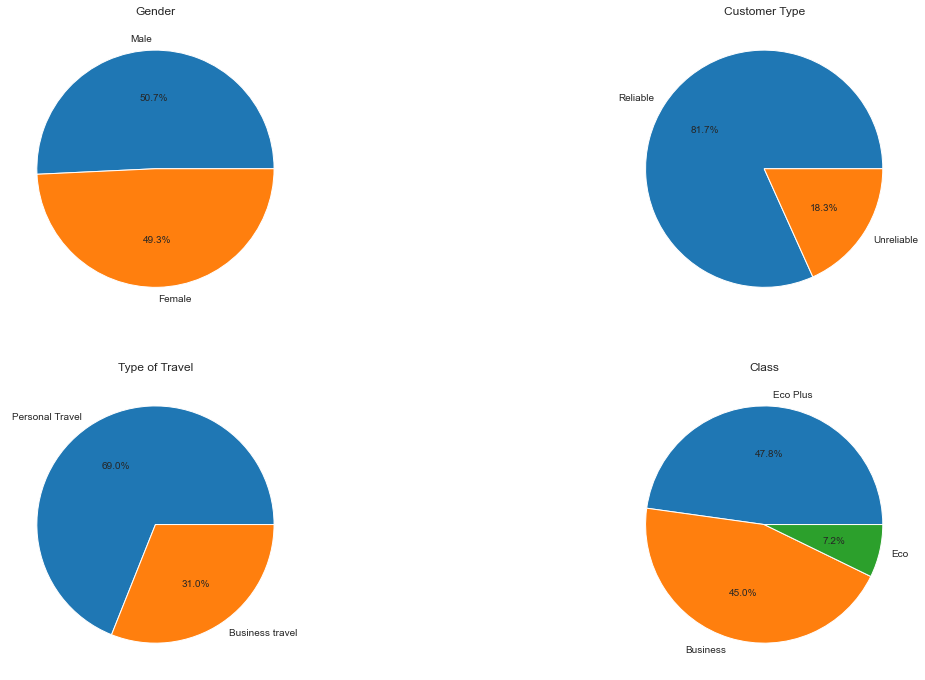

In [36]:
#changes the plot size 
plt.figure(figsize=(20,12))
sns.despine()
#for loop to create subplots to find the distribution of the categorical variables
for i,j in enumerate(l5):
    plt.subplot(2,2,i+1)
    plt.pie(df[j].value_counts(),labels=df[j].unique(),autopct='%1.1f%%')
    plt.title(j)
plt.show()

**Interpretation:**

**plot 1 :** from the pie chart gender we can see that although gender of the male and female is almost equal, male is 50.7% and female is 49.3%

**plot2 :** from the plot customer type it can be seen that the data,the majority of passengers from reliable customer (81.7%) and remaining passengers from unreliable (18.3%)

**plot 3 :** from the plot type of travel it can be seen that the data,the majority of passengers travel for personal work (69%) and remaining passengers for offical work(31%)

**plot 4 :** from the plot class It can be seen that the data, 47.8% of passengers from Economy plus class,45% of passengers from Business class and remaining 7.2% of passengers from Economy class

### Feature Engineering

In [37]:
## we convert these age column into 4 categories - 'kids','youth','adults','elders'
df['Age'] = pd.cut(x = df['Age'], bins=[7,16,28,55,85],labels=['kids','youth','adults','elders'])

In [38]:
## In test dataset also we convert these age column into 4 categories - 'kids','youth','adults','elders'
df_test['Age'] = pd.cut(x = df_test['Age'], bins=[7,16,28,55,85],labels=['kids','youth','adults','elders'])

In [39]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Reliable,kids,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,Unreliable,youth,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Reliable,youth,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Reliable,youth,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Reliable,elders,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


**Interpretation:** Age is continuous variable, from the above code, we split the age groups - (7 to 16) age passengers considered as kids,(17 to 28) age passengers considered as youth,(29 to 55) age passengers considered as adults and remaining (56 to 85) age passengers considered as elders

### Encoding

In [40]:
## we convert the categorical variables into numerical variable using (n-1)dummy encoding 
df = pd.get_dummies(df,columns=['Gender','Customer Type','Age','Type of Travel'],drop_first=True)

In [41]:
## In test dataset, we convert the categorical variables into numerical variable using (n-1)dummy encoding 
df_test = pd.get_dummies(df_test,columns=['Gender','Customer Type','Age','Type of Travel'],drop_first=True)

In [42]:
df.head()

,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_Unreliable,Age_youth,Age_adults,Age_elders,Type of Travel_Personal Travel
0,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,1,0,0,0,0,1
1,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,1,1,1,0,0,0
2,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,0,0,1,0,0,0
3,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0,0,1,0,0,0
4,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,1,0,0,0,1,0


**Interpretation:** Gender , customer type, age, and type of travel are categorical variables(nominal), from the above code we encoding the categorical variable into numerical variable( 0 and 1) because machine doesn't understands the categorical variables

In [43]:
## we convert the categorical variable (class) into numerical variable using map function (class is ordinal)
df['Class']=df['Class'].map({'Eco':0,'Eco Plus':1,'Business':2})

In [44]:
## In test dataset, we convert the categorical variable (class) into numerical variable using map function (class is ordinal)
df_test['Class']=df_test['Class'].map({'Eco':0,'Eco Plus':1,'Business':2})

In [45]:
df.head()

,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_Unreliable,Age_youth,Age_adults,Age_elders,Type of Travel_Personal Travel
0,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,1,0,0,0,0,1
1,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,1,1,1,0,0,0
2,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,0,0,1,0,0,0
3,2,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0,0,1,0,0,0
4,2,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,1,0,0,0,1,0


**Interpretation:** Class is ordinal categorical variable, we convert into numerical variable using map function and Eco(Economy) is simple(third class) and seating capacity is high compared to both Eco plus and Business class.so,we considered as 0. Eco plus(Economy plus) is sligtly premium than Eco(Economy).so, Eco plus considered as 1 and Business class is fully premium we considered as 2.

In [46]:
## satisfaction is our target variable ,we convert the column into numerical(0 and 1)
df['satisfaction']=df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

In [47]:
## In test dataset, satisfaction is our target variable ,we convert the column into numerical(0 and 1)
df_test['satisfaction']=df_test['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

In [48]:
df.head()

,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_Unreliable,Age_youth,Age_adults,Age_elders,Type of Travel_Personal Travel
0,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0,0,0,0,1
1,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,1,1,1,0,0,0
2,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0,0,1,0,0,0
3,2,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,0,0,1,0,0,0
4,2,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,1,0,0,0,1,0


**Interpretation:** Satisfaction is our target variable ,we convert the class nuetral or dissatisfied and satisfied into 0 and 1

### Base Model

In [49]:
## We split the data into independent(X_train) and dependent variables(y_train)
X_train=df.drop('satisfaction',axis=1)
y_train=df[['satisfaction']]

In [50]:
X_test = df_test.drop('satisfaction',axis=1)
y_test = df_test[['satisfaction']]

**Interpretation:** Satisfaction is our target variable and other than satisfaction are our independent or predictor variables

In [51]:
##Logistic Regression

In [52]:
## we add the constant in our X_train
Xc= sm.add_constant(X_train)

In [53]:
## we add the constant in our X_test
Xc_test= sm.add_constant(X_test)

**Interpretation:** Here we add the constant in X_train to build the logistic regression model

In [54]:
## fit the model in our data 
logistic_classification = sm.Logit(y_train,Xc).fit()
##summary gives the clear explanation about the model
logistic_classification.summary()

Optimization terminated successfully.
         Current function value: 0.333911
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:               103904
Model:                          Logit   Df Residuals:                   103879
Method:                           MLE   Df Model:                           24
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.5120
Time:                        10:09:44   Log-Likelihood:                -34695.
converged:                       True   LL-Null:                       -71094.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -7.0795      0.079    -89.747      0.000      -7.234      -6.925
Class                                 0.3623      0.013     28.237      0.000       0.337       0.387
Flight Distance                    2.551e-06   1.12e-05      0.228      0.819   -1.93e-05    2.44e-05
Inflight wifi service                 0.3870      0.011     33.870      0.000       0.365       0.409
Departure/Arrival time convenient    -0.1235      0.008    -15.022      0.000      -0.140      -0.107
Ease of Online booking               -0.1416      0.011    -12.493      0.000      -0.164      -0.119
Gate location                         0.0294      0.009      3.204      0.001       0.011       0.047
Food and drink                       -0.0269      0.011     -2.529      0.011      -0.048      -0.006
Online boarding                       0.6161      0.010     60.465      0.000       0.596       0.636
Seat comfort                          0.0723      0.011      6.486      0.000       0.050       0.094
Inflight entertainment                0.0603      0.014      4.235      0.000       0.032       0.088
On-board service                      0.3066      0.010     30.104      0.000       0.287       0.327
Leg room service                      0.2561      0.009     30.012      0.000       0.239       0.273
Baggage handling                      0.1357      0.011     11.863      0.000       0.113       0.158
Checkin service                       0.3264      0.009     38.142      0.000       0.310       0.343
Inflight service                      0.1214      0.012     10.077      0.000       0.098       0.145
Cleanliness                           0.2204      0.012     18.290      0.000       0.197       0.244
Departure Delay in Minutes            0.0042      0.001      4.568      0.000       0.002       0.006
Arrival Delay in Minutes             -0.0089      0.001     -9.814      0.000      -0.011      -0.007
Gender_Male                           0.0462      0.019      2.376      0.018       0.008       0.084
Customer Type_Unreliable             -2.0631      0.030    -68.048      0.000      -2.123      -2.004
Age_youth                             0.3887      0.048      8.027      0.000       0.294       0.484
Age_adults                            0.0524      0.046      1.139      0.255      -0.038       0.143
Age_elders                           -0.1742      0.050     -3.454      0.001      -0.273      -0.075
Type of Travel_Personal Travel       -2.7067      0.032    -85.292      0.000      -2.769      -2.645
=====================================================================================================
"""

**Interpretation:** we train the model from our training dataset ,fit is normally train the data for given dataset and summary gives the explanation about our model such as PsuedoR2,Loglikelihood and p-value etc.  
In our base model gives Pseudo R-squ.:	0.5120, Log-Likelihood:	-34695, LL-Null:	-71094 and LLR p-value:	0.000


In [302]:
## 'y_pred_prob' be the predicted values of y
y_pred_proba=logistic_classification.predict(Xc_test)
y_pred_proba

0        0.935859
1        0.865993
2        0.031393
3        0.303928
4        0.064367
           ...   
25971    0.292626
25972    0.979768
25973    0.035220
25974    0.874361
25975    0.001157
Length: 25976, dtype: float64

**Interpretation:** Normally,Logistic regression gives the probability output of the given data. from the above ,we use test data to predict the target class.

In [303]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred= [0 if i<0.5 else 1 for i in y_pred_proba]

**Interpretation:** Here we fix the threshold(cutoff) is 0.5 , the probability output from the logistic regression model is less than 0.5 - we considered as class 0 and the probability output is greater than 0.5 considered as class 1.

In [304]:
# calculate the accuracy
accuracy_logistic=accuracy_score(y_test,y_pred)
# print the accuracy
accuracy_logistic

0.8713042808746535

**Interpretation:** Accuracy is the ratio of correct predictions (i.e. TN+TP) to the total observations.Here, we get our accuracy is 87%

In [305]:
# pass the actual and predicted target values to the confusion_matrix()
confusion_matrix_logistic=confusion_matrix(y_test,y_pred)
confusion_matrix_logistic

array([[13129,  1444],
       [ 1899,  9504]], dtype=int64)

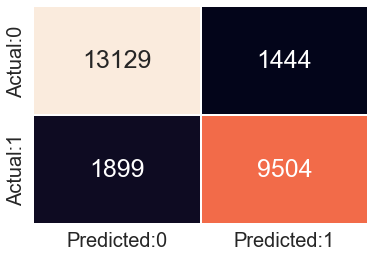

In [307]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Interpretation:** Confusion matrix gives True positive,True negative,False positive and False negative.

In model classified correctly are TN (class 0),TP(class 1) and misclassified are FN(Actual '1' values which are classified wrongly as '0'), FP(Actual '0' values which are classified wrongly as '1'). 

Here,output of 

TN -13129,

TP-9504,

FP-1444,

FN-1899

In [59]:
# calculate various performance measures
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



**Interpretation:** In classification report ,we get various performance measures such as precision, recall, f1-score and accuracy.
    
Precision score for class 0 and class 1 are 0.87 and 0.87 
    
recall score for class 0 and class 1 are 0.90 and 0.83

f1-score for class 0 and class 1 are 0.89 and 0.85

In [60]:
precision_logistic=precision_score(y_test,y_pred)
precision_logistic

0.8681037632444282

In [61]:
recall_logistic=recall_score(y_test,y_pred)
recall_logistic

0.8334648776637726

In [62]:
f1_score_logistic = f1_score(y_test,y_pred)
f1_score_logistic

0.8504317480202228

In [63]:
roc_auc_logistic = roc_auc_score(y_test, y_pred_proba)
roc_auc_logistic

0.926019184524564

In [64]:
from sklearn.metrics import roc_auc_score,roc_curve

In [65]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_proba)

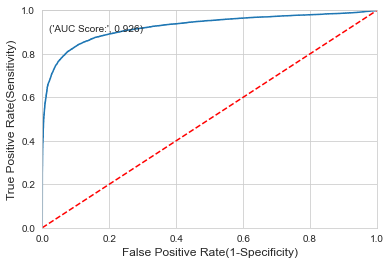

In [66]:
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_proba),4)))
plt.xlabel('False Positive Rate(1-Specificity)',fontsize=12)
plt.ylabel('True Positive Rate(Sensitivity)',fontsize=12)
plt.show()

### Naive Bayes Model

In [67]:
# we use naive bayes algorithm
Naive_bayes=GaussianNB()

In [68]:
# fit the model in our data
Naive_bayes_model =Naive_bayes.fit(X_train,y_train)

In [308]:
# 'y_pred' be the predicted values of y(target values)
y_pred=Naive_bayes_model.predict(X_test)

**Interpretation:** In naive bayes model ,predict keyword gives the predicted values of the target class

In [309]:
# calculate the accuracy
accuracy_Naive_bayes=accuracy_score(y_test,y_pred)
# Print the accuracy
accuracy_Naive_bayes

0.8611025562057284

**Interpretation:** Accuracy is the ratio of correct predictions (i.e. TN+TP) to the total observations.Here, we get our accuracy is 86%

In [310]:
confusion_matrix_Naive_bayes=confusion_matrix(y_test,y_pred)
confusion_matrix_Naive_bayes

array([[13013,  1560],
       [ 2048,  9355]], dtype=int64)

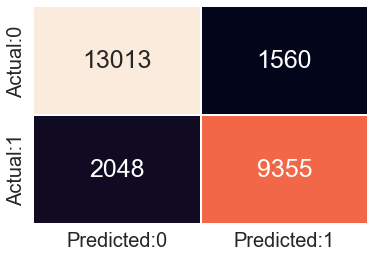

In [311]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Interpretation:** Confusion matrix gives the output of 
    
TN -13013,

TP-9355,

FP-1560,

FN-2048

In [72]:
# calculate various performance measures for Naive bayes
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     14573
           1       0.86      0.82      0.84     11403

    accuracy                           0.86     25976
   macro avg       0.86      0.86      0.86     25976
weighted avg       0.86      0.86      0.86     25976



**Interpretation:** In classification report ,we get various performance measures such as precision, recall, f1-score and accuracy.

Precision score for class 0 and class 1 are 0.86 and 0.86 

recall score for class 0 and class 1 are 0.89 and 0.82

f1-score for class 0 and class 1 are 0.88 and 0.84

In [73]:
y_pred_proba = Naive_bayes_model.predict_proba(X_test)

In [74]:
roc_auc_naive_bayes = roc_auc_score(y_test, y_pred_proba[:,1])
roc_auc_naive_bayes

0.9185704879417578

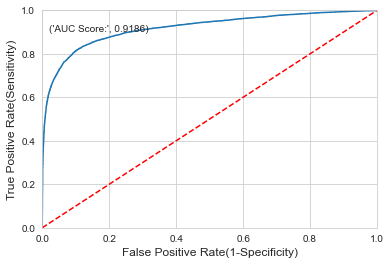

In [75]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_proba[:,1]),4)))
plt.xlabel('False Positive Rate(1-Specificity)',fontsize=12)
plt.ylabel('True Positive Rate(Sensitivity)',fontsize=12)
plt.show()

### KNN Model

In [76]:
knn = KNeighborsClassifier()

In [77]:
# fit the model in our data
knn_model =knn.fit(X_train,y_train)

In [78]:
# 'y_pred' be the predicted values of y(target values)
y_pred_t=knn_model.predict(X_train)

In [79]:
# calculate the accuracy for train
accuracy_knnt=accuracy_score(y_train,y_pred_t)
# Print the accuracy for train
accuracy_knnt

0.8600342623960578

In [80]:
# calculate various performance measures for knn
print(classification_report(y_train,y_pred_t))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     58879
           1       0.87      0.79      0.83     45025

    accuracy                           0.86    103904
   macro avg       0.86      0.85      0.86    103904
weighted avg       0.86      0.86      0.86    103904



In [312]:
# 'y_pred' be the predicted values of y(target values)
y_pred=knn_model.predict(X_test)

In [313]:
# calculate the accuracy
accuracy_knn=accuracy_score(y_test,y_pred)
# Print the accuracy
accuracy_knn

0.7866107175854635

In [314]:
confusion_matrix_knn=confusion_matrix(y_test,y_pred)
confusion_matrix_knn

array([[12424,  2149],
       [ 3394,  8009]], dtype=int64)

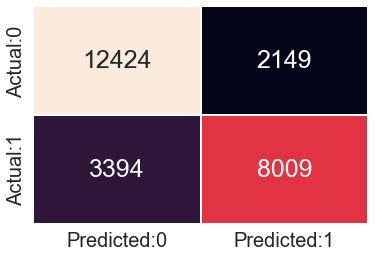

In [315]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [84]:
# calculate various performance measures for knn
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82     14573
           1       0.79      0.70      0.74     11403

    accuracy                           0.79     25976
   macro avg       0.79      0.78      0.78     25976
weighted avg       0.79      0.79      0.78     25976



In [85]:
y_pred_proba = Naive_bayes_model.predict_proba(X_test)
roc_auc_naive_bayes = roc_auc_score(y_test, y_pred_proba[:,1])
roc_auc_naive_bayes


0.9185704879417578

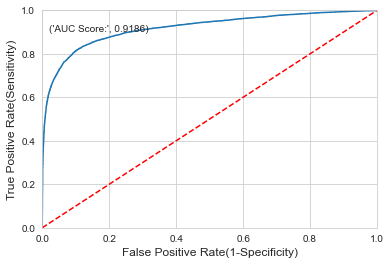

In [86]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_proba[:,1]),4)))
plt.xlabel('False Positive Rate(1-Specificity)',fontsize=12)
plt.ylabel('True Positive Rate(Sensitivity)',fontsize=12)
plt.show()

### Decision Tree Model

In [87]:
dt = DecisionTreeClassifier()

In [88]:
dt_model = dt.fit(X_train,y_train)

In [89]:
# 'y_pred' be the predicted values of y(target values)
y_pred_t=dt_model.predict(X_train)
# calculate the accuracy for train
accuracy_dtt=accuracy_score(y_train,y_pred_t)
# Print the accuracy for train
accuracy_dtt

1.0

In [90]:
# calculate various performance measures for decision tree
print(classification_report(y_train,y_pred_t))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58879
           1       1.00      1.00      1.00     45025

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904



In [316]:
# 'y_pred' be the predicted values of y(target values)
y_pred=dt_model.predict(X_test)

In [317]:
# calculate the accuracy
accuracy_dt=accuracy_score(y_test,y_pred)
# Print the accuracy
accuracy_dt

0.9471050200184786

In [318]:
confusion_matrix_dt=confusion_matrix(y_test,y_pred)
confusion_matrix_dt

array([[13880,   693],
       [  681, 10722]], dtype=int64)

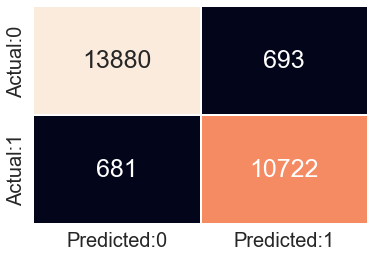

In [319]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [94]:
# calculate various performance measures for decision tree
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14573
           1       0.94      0.94      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [95]:
y_pred_proba = dt_model.predict_proba(X_test)
roc_auc_dt = roc_auc_score(y_test, y_pred)
roc_auc_dt


0.9463625893953985

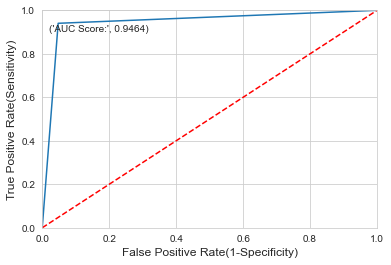

In [96]:
fpr,tpr,threshold = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.xlabel('False Positive Rate(1-Specificity)',fontsize=12)
plt.ylabel('True Positive Rate(Sensitivity)',fontsize=12)
plt.show()

### Random Forest Model

In [97]:
rf = RandomForestClassifier()

In [98]:
# fit the model in our data
rf_model =rf.fit(X_train,y_train)

In [99]:
# 'y_pred' be the predicted values of y(target values)
y_pred_t=rf_model.predict(X_train)
# calculate the accuracy for train
accuracy_rft=accuracy_score(y_train,y_pred_t)
# Print the accuracy for train
accuracy_rft

1.0

In [100]:
# calculate various performance measures for random forest
print(classification_report(y_train,y_pred_t))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58879
           1       1.00      1.00      1.00     45025

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904



In [320]:
# 'y_pred' be the predicted values of y(target values)
y_pred=rf_model.predict(X_test)

In [321]:
# calculate the accuracy
accuracy_rf=accuracy_score(y_test,y_pred)
# Print the accuracy
accuracy_rf

0.9618493994456422

In [322]:
confusion_matrix_rf=confusion_matrix(y_test,y_pred)
confusion_matrix_rf

array([[14249,   324],
       [  667, 10736]], dtype=int64)

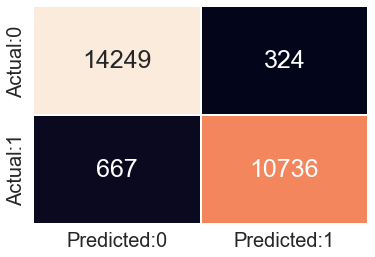

In [323]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [104]:
# calculate various performance measures for random forest
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



### AdaBoost Model

In [105]:
ada = AdaBoostClassifier()

In [106]:
# fit the model in our data
ada_model =ada.fit(X_train,y_train)

In [107]:
# 'y_pred' be the predicted values of y(target values)
y_pred_t=ada_model.predict(X_train)
# calculate the accuracy for train
accuracy_adat=accuracy_score(y_train,y_pred_t)
# Print the accuracy for train
accuracy_adat

0.9279142285186326

In [108]:
# calculate various performance measures for Ada Boost
print(classification_report(y_train,y_pred_t))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     58879
           1       0.92      0.91      0.92     45025

    accuracy                           0.93    103904
   macro avg       0.93      0.93      0.93    103904
weighted avg       0.93      0.93      0.93    103904



In [324]:
# 'y_pred' be the predicted values of y(target values)
y_pred=ada_model.predict(X_test)

In [325]:
# calculate the accuracy for test
accuracy_ada=accuracy_score(y_test,y_pred)
# Print the accuracy for test
accuracy_ada

0.9276255004619649

In [326]:
confusion_matrix_ada=confusion_matrix(y_test,y_pred)
confusion_matrix_ada

array([[13712,   861],
       [ 1019, 10384]], dtype=int64)

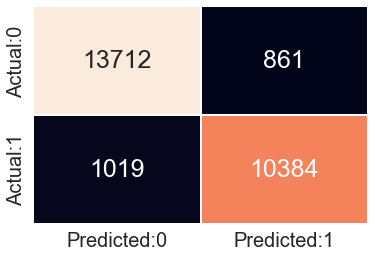

In [327]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [112]:
# calculate various performance measures for Ada Boost
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     14573
           1       0.92      0.91      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



### Gradient Boosting Model

In [113]:
gb = GradientBoostingClassifier()

In [114]:
# fit the model in our data
gb_model =gb.fit(X_train,y_train)

In [115]:
# 'y_pred' be the predicted values of y(target values)
y_pred_t=gb_model.predict(X_train)
# calculate the accuracy for train
accuracy_gbt=accuracy_score(y_train,y_pred_t)
# Print the accuracy for train
accuracy_gbt


0.9421004003695719

In [116]:
# calculate various performance measures for Gradient Boost
print(classification_report(y_train,y_pred_t))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     58879
           1       0.94      0.92      0.93     45025

    accuracy                           0.94    103904
   macro avg       0.94      0.94      0.94    103904
weighted avg       0.94      0.94      0.94    103904



In [328]:
# 'y_pred' be the predicted values of y(target values)
y_pred=gb_model.predict(X_test)

In [329]:
# calculate the accuracy
accuracy_gb=accuracy_score(y_test,y_pred)
# Print the accuracy
accuracy_gb

0.9417154296273483

In [330]:
confusion_matrix_gb=confusion_matrix(y_test,y_pred)
confusion_matrix_gb

array([[13955,   618],
       [  896, 10507]], dtype=int64)

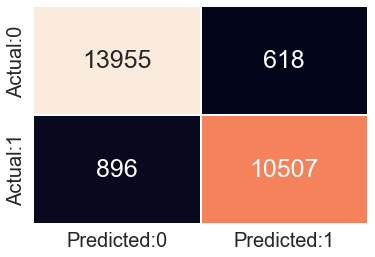

In [331]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [120]:
# calculate various performance measures for Gradient Boost
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14573
           1       0.94      0.92      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



### Xg Boost Model

In [121]:
xg = XGBClassifier()

In [122]:
# fit the model in our data
xg_model =xg.fit(X_train,y_train)


In [123]:
# 'y_pred' be the predicted values of y(target values)
y_pred_t=xg_model.predict(X_train)
# calculate the accuracy for train
accuracy_xgt=accuracy_score(y_train,y_pred_t)
# Print the accuracy for train
accuracy_xgt

0.9732734062211272

In [124]:
# calculate various performance measures for XG Boost
print(classification_report(y_train,y_pred_t))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     58879
           1       0.98      0.96      0.97     45025

    accuracy                           0.97    103904
   macro avg       0.97      0.97      0.97    103904
weighted avg       0.97      0.97      0.97    103904



In [332]:
# 'y_pred' be the predicted values of y(target values)
y_pred=xg_model.predict(X_test)

In [333]:
# calculate the accuracy for test
accuracy_xg=accuracy_score(y_test,y_pred)
# Print the accuracy for test
accuracy_xg

0.9621958731136434

In [334]:
confusion_matrix_xg=confusion_matrix(y_test,y_pred)
confusion_matrix_xg

array([[14258,   315],
       [  667, 10736]], dtype=int64)

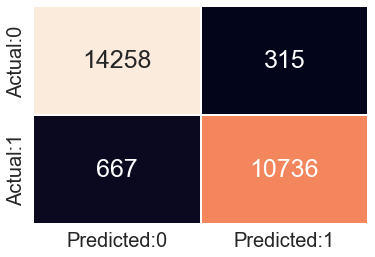

In [335]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [128]:
# calculate various performance measures for XG boost
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



### Feature Selection

In [129]:
rf =RandomForestClassifier()

In [130]:
sfs = sfs(estimator=rf,k_features='best',cv=5,n_jobs=-1,scoring='f1')

In [131]:
sfs_model = sfs.fit(X_train,y_train)

In [132]:
best_features =sfs_model.k_feature_names_

In [133]:
X_train_sfs = X_train.loc[:,best_features]

In [134]:
X_test_sfs = X_test.loc[:,best_features]

### RandomForest Using Best Features

In [135]:
rf_sfs = RandomForestClassifier()

In [136]:
# fit the model in our data
rf_sfs_model =rf.fit(X_train_sfs,y_train)

In [137]:
# 'y_pred' be the predicted values of y(target values)
y_pred_t=rf_sfs_model.predict(X_train_sfs)

In [138]:
# calculate the accuracy
accuracy_rf_sfst=accuracy_score(y_train,y_pred_t)
# Print the accuracy
accuracy_rf_sfst

1.0

In [139]:
# calculate various performance measures for Random forest
print(classification_report(y_train,y_pred_t))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58879
           1       1.00      1.00      1.00     45025

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904



In [336]:
# 'y_pred' be the predicted values of y(target values)
y_pred=rf_sfs_model.predict(X_test_sfs)

In [337]:
# calculate the accuracy
accuracy_rf_sfs=accuracy_score(y_test,y_pred)
# Print the accuracy
accuracy_rf_sfs

0.9629658145980905

In [338]:
confusion_matrix_sfs=confusion_matrix(y_test,y_pred)
confusion_matrix_sfs

array([[14287,   286],
       [  676, 10727]], dtype=int64)

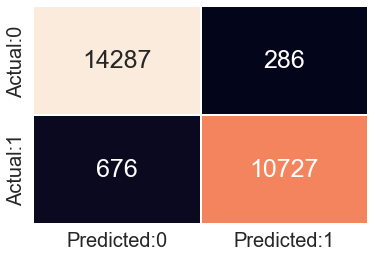

In [339]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [143]:
# calculate various performance measures for Random forest
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



### NaiveBayes Using Best Features

In [144]:
# we use naive bayes algorithm
Naive_bayes=GaussianNB()

In [145]:
# fit the model in our data
Naive_bayes_sfs_model =Naive_bayes.fit(X_train_sfs,y_train)
# 'y_pred' be the predicted values of y(target values)



In [340]:
y_pred=Naive_bayes_sfs_model.predict(X_test_sfs)

In [341]:
# calculate the accuracy
accuracy_Naive_bayes_sfs=accuracy_score(y_test,y_pred)
# Print the accuracy
accuracy_Naive_bayes_sfs


0.8618340006159532

In [342]:
confusion_matrix_Naive_bayes=confusion_matrix(y_test,y_pred)
confusion_matrix_Naive_bayes


array([[13155,  1418],
       [ 2171,  9232]], dtype=int64)

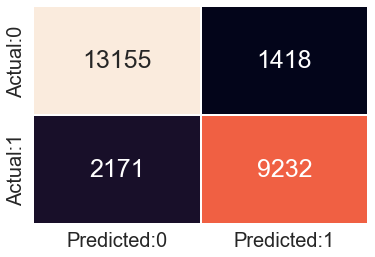

In [343]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [148]:
# calculate various performance measures for Naive bayes
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     14573
           1       0.87      0.81      0.84     11403

    accuracy                           0.86     25976
   macro avg       0.86      0.86      0.86     25976
weighted avg       0.86      0.86      0.86     25976



### KNN using Best Features

In [149]:
knn = KNeighborsClassifier()

In [150]:
# fit the model in our data
knn_model_sfs =knn.fit(X_train_sfs,y_train)



In [344]:
# 'y_pred' be the predicted values of y(target values)
y_pred=knn_model_sfs.predict(X_test_sfs)


In [345]:
# calculate the accuracy
accuracy_knn_sfs=accuracy_score(y_test,y_pred)
# Print the accuracy
accuracy_knn_sfs


0.8580227902679396

In [346]:
confusion_matrix_knn_sfs=confusion_matrix(y_test,y_pred)
confusion_matrix_knn_sfs


array([[13284,  1289],
       [ 2399,  9004]], dtype=int64)

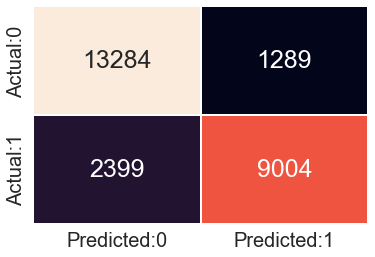

In [347]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [348]:
# calculate various performance measures for Knn
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     14573
           1       0.87      0.79      0.83     11403

    accuracy                           0.86     25976
   macro avg       0.86      0.85      0.85     25976
weighted avg       0.86      0.86      0.86     25976



### Decision Tree Using Best Features

In [154]:
dt = DecisionTreeClassifier()
dt_model_sfs = dt.fit(X_train_sfs,y_train)
# 'y_pred' be the predicted values of y(target values)
y_pred_t=dt_model_sfs.predict(X_train_sfs)
# calculate the accuracy for train
accuracy_dtt_sfs=accuracy_score(y_train,y_pred_t)
# Print the accuracy for train
accuracy_dtt_sfs


1.0

In [155]:
# calculate various performance measures for decision tree
print(classification_report(y_train,y_pred_t))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58879
           1       1.00      1.00      1.00     45025

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904



In [349]:
# 'y_pred' be the predicted values of y(target values)
y_pred=dt_model_sfs.predict(X_test_sfs)
# calculate the accuracy
accuracy_dt_sfs=accuracy_score(y_test,y_pred)
# Print the accuracy
accuracy_dt_sfs


0.9454496458269172

In [350]:
confusion_matrix_dt_sfs=confusion_matrix(y_test,y_pred)
confusion_matrix_dt_sfs


array([[13817,   756],
       [  661, 10742]], dtype=int64)

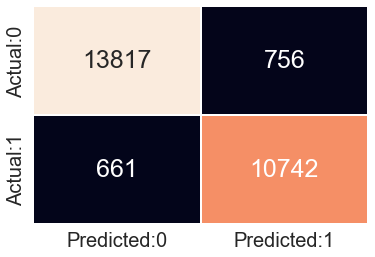

In [351]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [158]:
# calculate various performance measures for decision tree
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14573
           1       0.93      0.94      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.94      0.95      0.94     25976
weighted avg       0.95      0.95      0.95     25976



### AdaBoost Using Best Features

In [159]:
ada = AdaBoostClassifier()
# fit the model in our data
ada_model_sfs =ada.fit(X_train_sfs,y_train)
# 'y_pred' be the predicted values of y(target values)
y_pred_t=ada_model_sfs.predict(X_train_sfs)
# calculate the accuracy for train
accuracy_adat_sfs=accuracy_score(y_train,y_pred_t)
# Print the accuracy for train
accuracy_adat_sfs


0.9279719741299661

In [160]:
# calculate various performance measures for Ada Boost
print(classification_report(y_train,y_pred_t))


              precision    recall  f1-score   support

           0       0.93      0.94      0.94     58879
           1       0.93      0.91      0.92     45025

    accuracy                           0.93    103904
   macro avg       0.93      0.93      0.93    103904
weighted avg       0.93      0.93      0.93    103904



In [352]:
# 'y_pred' be the predicted values of y(target values)
y_pred=ada_model_sfs.predict(X_test_sfs)
# calculate the accuracy for test
accuracy_ada_sfs=accuracy_score(y_test,y_pred)
# Print the accuracy for test
accuracy_ada_sfs


0.9278949799815214

In [353]:
confusion_matrix_ada_sfs=confusion_matrix(y_test,y_pred)
confusion_matrix_ada_sfs


array([[13742,   831],
       [ 1042, 10361]], dtype=int64)

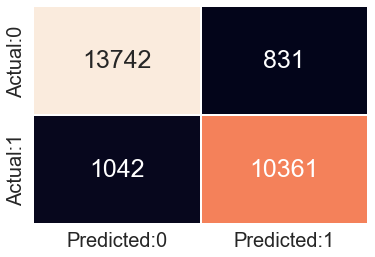

In [354]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [163]:
# calculate various performance measures for Ada Boost
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     14573
           1       0.93      0.91      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



### GradientBoost Using Best Features

In [164]:
gb = GradientBoostingClassifier()
# fit the model in our data
gb_model_sfs =gb.fit(X_train_sfs,y_train)
# 'y_pred' be the predicted values of y(target values)
y_pred_t=gb_model_sfs.predict(X_train_sfs)
# calculate the accuracy for train
accuracy_gbt_sfs=accuracy_score(y_train,y_pred_t)
# Print the accuracy for train
accuracy_gbt_sfs


0.9418309208500154

In [165]:
# calculate various performance measures for Gradient Boost
print(classification_report(y_train,y_pred_t))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     58879
           1       0.95      0.92      0.93     45025

    accuracy                           0.94    103904
   macro avg       0.94      0.94      0.94    103904
weighted avg       0.94      0.94      0.94    103904



In [355]:
# 'y_pred' be the predicted values of y(target values)
y_pred=gb_model_sfs.predict(X_test_sfs)
# calculate the accuracy
accuracy_gb_sfs=accuracy_score(y_test,y_pred)
# Print the accuracy
accuracy_gb_sfs

0.9421004003695719

In [356]:
confusion_matrix_gb_sfs=confusion_matrix(y_test,y_pred)
confusion_matrix_gb_sfs

array([[13967,   606],
       [  898, 10505]], dtype=int64)

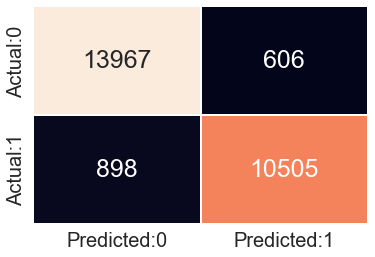

In [357]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [168]:
# calculate various performance measures for Gradient Boost
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14573
           1       0.95      0.92      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



### XGBoost Using Best Features

In [361]:
xg = XGBClassifier()
# fit the model in our data
xg_model_sfs =xg.fit(X_train_sfs,y_train)
# 'y_pred' be the predicted values of y(target values)
y_pred_t=xg_model_sfs.predict(X_train_sfs)
# calculate the accuracy for train
accuracy_xgt_sfs=accuracy_score(y_train,y_pred_t)
# Print the accuracy for train
accuracy_xgt_sfs


0.9718778872805667

In [170]:
# calculate various performance measures for XG Boost
print(classification_report(y_train,y_pred_t))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     58879
           1       0.98      0.95      0.97     45025

    accuracy                           0.97    103904
   macro avg       0.97      0.97      0.97    103904
weighted avg       0.97      0.97      0.97    103904



In [362]:
# 'y_pred' be the predicted values of y(target values)
y_pred=xg_model_sfs.predict(X_test_sfs)
# calculate the accuracy for test
accuracy_xg_sfs=accuracy_score(y_test,y_pred)
# Print the accuracy for test
accuracy_xg_sfs


0.9629273175238682

In [363]:
confusion_matrix_xg=confusion_matrix(y_test,y_pred)
confusion_matrix_xg

array([[14268,   305],
       [  658, 10745]], dtype=int64)

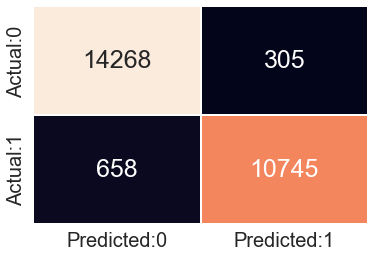

In [364]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [173]:
# calculate various performance measures for XG boost
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



## RandomizedSearchCV of Random Forest 


In [223]:
n_estimators = [100, 200, 300, 400, 500]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 20, 30, 40, 50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
        
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
       
        
model_tuned = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 2, cv = 2, verbose=0, random_state=100 , n_jobs = -1)
model_tuned.fit(X_train,y_train)
model_tuned.best_params_
model_tuned.best_score_

0.9595876963350785

In [224]:
print(model_tuned.best_params_)
print(model_tuned.best_score_)

{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
0.9595876963350785


In [230]:
rf_g = RandomForestClassifier(n_estimators= 300, min_samples_split= 10, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 20, bootstrap = False)
# fit the model in our data
rf_g_model =rf_g.fit(X_train,y_train)
# 'y_pred' be the predicted values of y(target values)
y_pred_t=rf_g_model.predict(X_train)
# calculate the accuracy
accuracy_rf_gt=accuracy_score(y_train,y_pred_t)
# Print the accuracy
accuracy_rf_gt

0.985428857406837

In [232]:
# calculate various performance measures for Random forest
print(classification_report(y_train,y_pred_t))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58879
           1       0.99      0.97      0.98     45025

    accuracy                           0.99    103904
   macro avg       0.99      0.98      0.99    103904
weighted avg       0.99      0.99      0.99    103904



In [365]:
# 'y_pred' be the predicted values of y(target values)
y_pred=rf_g_model.predict(X_test)

# calculate the accuracy
accuracy_rf_g=accuracy_score(y_test,y_pred)
# Print the accuracy
accuracy_rf_g

0.9620418848167539

In [366]:
confusion_matrix_g=confusion_matrix(y_test,y_pred)
confusion_matrix_g

array([[14248,   325],
       [  661, 10742]], dtype=int64)

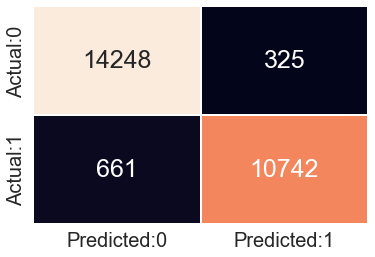

In [367]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [235]:
# calculate various performance measures for Random forest
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



## Random Forest using RandomizedsearchCV with best features

In [295]:
rf_gs = RandomForestClassifier(n_estimators= 300, min_samples_split= 10, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 20, bootstrap = False)
# fit the model in our data
rf_gsfs_model =rf_gs.fit(X_train_sfs,y_train)
# 'y_pred' be the predicted values of y(target values)
y_pred_t=rf_gsfs_model.predict(X_train_sfs)
# calculate the accuracy
accuracy_rf_gsfst=accuracy_score(y_train,y_pred_t)
# Print the accuracy
accuracy_rf_gsfst

0.9827244379427164

In [296]:
# calculate various performance measures for Random forest
print(classification_report(y_train,y_pred_t))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     58879
           1       0.99      0.97      0.98     45025

    accuracy                           0.98    103904
   macro avg       0.98      0.98      0.98    103904
weighted avg       0.98      0.98      0.98    103904



In [368]:
# 'y_pred' be the predicted values of y(target values)
y_pred=rf_gsfs_model.predict(X_test_sfs)

# calculate the accuracy
accuracy_rf_gsfs=accuracy_score(y_test,y_pred)
# Print the accuracy
accuracy_rf_gsfs

0.9633122882660918

In [370]:
confusion_matrix_gsfs=confusion_matrix(y_test,y_pred)
confusion_matrix_gsfs

array([[14305,   268],
       [  685, 10718]], dtype=int64)

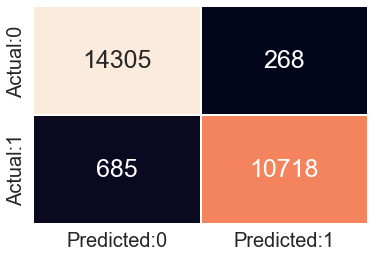

In [371]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [299]:
# calculate various performance measures for Random forest
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14573
           1       0.98      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



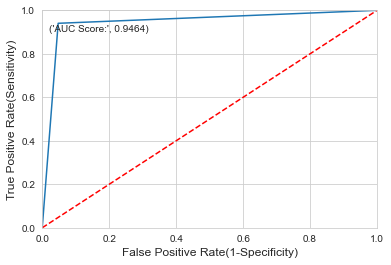

In [300]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_proba[:,1]),4)))
plt.xlabel('False Positive Rate(1-Specificity)',fontsize=12)
plt.ylabel('True Positive Rate(Sensitivity)',fontsize=12)
plt.show()

### Model Built Using PCA

In [183]:
ss=StandardScaler()

In [184]:
X_train_sfs_sc = ss.fit_transform(X_train_sfs[['Flight Distance']])

# print the dimension of the standardized data
print(X_train_sfs_sc.shape)

(103904, 1)


In [185]:
X_test_sfs_sc = ss.fit_transform(X_test_sfs[['Flight Distance']])

# print the dimension of the standardized data
print(X_test_sfs_sc.shape)

(25976, 1)


In [186]:
X_train_sfs_sc = pd.DataFrame(X_train_sfs_sc,columns=['Flight Distance'],index=X_train_sfs.index)
X_train_sfs_sc.head()

,Flight Distance
0,-0.731539
1,-0.957184
2,-0.047584
3,-0.629246
4,-0.978244


In [187]:
X_test_sfs_sc = pd.DataFrame(X_test_sfs_sc,columns=['Flight Distance'],index=X_test_sfs.index)
X_test_sfs_sc.head()

,Flight Distance
0,-1.035171
1,1.671443
2,-1.003128
3,2.186131
4,-0.011804


In [188]:
X_train_sfs_sc_df = pd.concat([X_train_sfs_sc,X_train_sfs.drop('Flight Distance',axis=1)],axis=1)

In [189]:
X_test_sfs_sc_df = pd.concat([X_test_sfs_sc,X_test_sfs.drop('Flight Distance',axis=1)],axis=1)

In [190]:
X_train_sfs_sc_df.head()

,Flight Distance,Class,Inflight wifi service,Departure/Arrival time convenient,Gate location,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Customer Type_Unreliable,Age_youth,Type of Travel_Personal Travel
0,-0.731539,1,3,4,1,3,5,5,4,3,4,4,5,5,0,0,1
1,-0.957184,2,3,2,3,3,1,1,1,5,3,1,4,1,1,1,0
2,-0.047584,2,2,2,2,5,5,5,4,3,4,4,4,5,0,1,0
3,-0.629246,2,2,5,5,2,2,2,2,5,3,1,4,2,0,1,0
4,-0.978244,2,3,3,3,5,5,3,3,4,4,3,3,3,0,0,0


In [191]:
X_test_sfs_sc_df.head()

,Flight Distance,Class,Inflight wifi service,Departure/Arrival time convenient,Gate location,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Customer Type_Unreliable,Age_youth,Type of Travel_Personal Travel
0,-1.035171,0,5,4,4,4,3,5,5,5,5,2,5,5,0,0,0
1,1.671443,2,1,1,1,4,5,4,4,4,4,3,4,5,0,0,0
2,-1.003128,0,2,0,4,2,2,2,4,1,3,2,2,2,1,1,0
3,2.186131,2,0,0,2,4,4,1,1,1,1,3,1,4,0,0,0
4,-0.011804,0,2,3,3,1,2,2,2,2,2,4,2,4,0,0,0


In [192]:
cov_matrix = np.cov(X_train_sfs_sc_df.T)

In [193]:
eigen_value,eigen_vector = np.linalg.eig(cov_matrix)

In [194]:
eigen_value

array([5.91998981, 3.36837795, 3.06439541, 1.86696237, 1.57660117,
       1.31801595, 1.1540531 , 1.03814556, 0.06421658, 0.12557953,
       0.20235148, 0.75943538, 0.34378927, 0.66906259, 0.50347018,
       0.51923746, 0.51283843])

In [195]:
total = sum(eigen_value)
total

23.006522221087916

In [196]:
var_exp = [(i/total)*100 for i in sorted(eigen_value,reverse=True)]
var_exp

[25.731789238145726,
 14.640969731303136,
 13.319681189764074,
 8.114926506384046,
 6.8528443905645915,
 5.728879578210457,
 5.016199706754814,
 4.512396759207092,
 3.300956890047155,
 2.908143091981486,
 2.2569141806402278,
 2.229100170797884,
 2.1883802263791536,
 1.4943122035998366,
 0.8795396092719093,
 0.5458431653078025,
 0.27912336164060164]

In [197]:
cum_var = np.cumsum(var_exp)
cum_var

array([ 25.73178924,  40.37275897,  53.69244016,  61.80736667,
        68.66021106,  74.38909063,  79.40529034,  83.9176871 ,
        87.21864399,  90.12678708,  92.38370126,  94.61280143,
        96.80118166,  98.29549386,  99.17503347,  99.72087664,
       100.        ])

In [198]:
from sklearn.decomposition import PCA

In [199]:
pca = PCA(n_components=12)
pca_model = pca.fit_transform(X_train_sfs_sc_df)
pca_df = pd.DataFrame(pca_model,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])

In [200]:
pca1 = PCA(n_components=12)
pca_model1 = pca1.fit_transform(X_test_sfs_sc_df)
pca_df_test = pd.DataFrame(pca_model1,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])

In [201]:
xg = XGBClassifier()

In [202]:
xg_model_pca = xg.fit(pca_df,y_train)

In [203]:
y_pred_t = xg_model_pca.predict(pca_df)

In [204]:
accuracy_score_pca_train = accuracy_score(y_train,y_pred_t)
accuracy_score_pca_train 

0.9507429935324915

In [205]:
print(classification_report(y_train,y_pred_t))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     58879
           1       0.96      0.92      0.94     45025

    accuracy                           0.95    103904
   macro avg       0.95      0.95      0.95    103904
weighted avg       0.95      0.95      0.95    103904



In [243]:
y_pred = xg_model_pca.predict(pca_df_test) 

In [207]:
accuracy_score_pca_test = accuracy_score(y_test,y_pred)
accuracy_score_pca_test 

0.8218740375731445

In [208]:
confusion_matrix_pca = confusion_matrix(y_test,y_pred)
confusion_matrix_pca

array([[12625,  1948],
       [ 2679,  8724]], dtype=int64)

In [209]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85     14573
           1       0.82      0.77      0.79     11403

    accuracy                           0.82     25976
   macro avg       0.82      0.82      0.82     25976
weighted avg       0.82      0.82      0.82     25976



###  XGBoost Using PCA

In [374]:
xg = XGBClassifier()
# fit the model in our data
xg_model_sfs =xg.fit(pca_df,y_train)
# 'y_pred' be the predicted values of y(target values)
y_pred_t=xg_model_sfs.predict(pca_df)
# calculate the accuracy for train
accuracy_xgt_pca=accuracy_score(y_train,y_pred_t)
# Print the accuracy for train
accuracy_xgt_pca


0.9507429935324915

In [226]:
# calculate various performance measures for XG Boost
print(classification_report(y_train,y_pred_t))


              precision    recall  f1-score   support

           0       0.94      0.97      0.96     58879
           1       0.96      0.92      0.94     45025

    accuracy                           0.95    103904
   macro avg       0.95      0.95      0.95    103904
weighted avg       0.95      0.95      0.95    103904



In [375]:
# 'y_pred' be the predicted values of y(target values)
y_pred=xg_model_sfs.predict(pca_df_test)
# calculate the accuracy for test
accuracy_xg_pca=accuracy_score(y_test,y_pred)
# Print the accuracy for test
accuracy_xg_pca


0.8218740375731445

In [376]:
confusion_matrix_xg=confusion_matrix(y_test,y_pred)
confusion_matrix_xg


array([[12625,  1948],
       [ 2679,  8724]], dtype=int64)

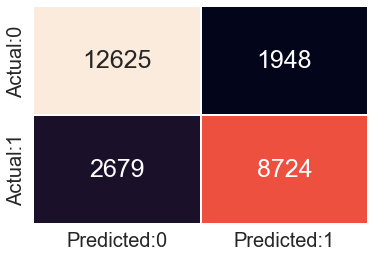

In [377]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [229]:
# calculate various performance measures for XG boost
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85     14573
           1       0.82      0.77      0.79     11403

    accuracy                           0.82     25976
   macro avg       0.82      0.82      0.82     25976
weighted avg       0.82      0.82      0.82     25976



In [241]:
results = pd.DataFrame()


In [245]:
results['model_name'] = ['logistic regression-base_model','Naive-Bayes','KNN','Decision Tree','Random forest','Ada boost','Gradient Boost','XG-Boost','Random Forest','Naive-Bayes','KNN','Decision Tree','Ada boost','Gradient Boost','XG-boost','Random forest','Random Forest','XG-Boost']

In [260]:
results['Approach'] = ['all_features','all_features','all_features','all_features','all_features','all_features','all_features','all_features','best_features','best_features','best_features','best_features','best_features','best_features','best_features','hyper tuning gridsearchCV','hyper tuning gridsearchCV with best features','PCA using best features']

In [261]:
results['Accuracy'] =[87,86,79,95,96,93,94,96,96,86,86,95,93,94,96,96,96,82]

In [262]:
results['Presicion'] = [87,86,79,94,97,92,94,97,97,87,87,93,93,95,97,97,97,82]

In [263]:
results['Recall'] = [83,82,70,94,94,91,92,94,94,81,79,94,91,92,94,94,94,77]

In [264]:
results['F1-Score'] =[85,84,74,94,94,92,93,96,96,84,83,94,92,93,96,96,96,79]

In [266]:
results_copy = results.copy()

In [294]:
results_copy.to_csv('for_tablue.csv')

In [290]:

graph = results_copy.set_index(['model_name','Approach']).sort_values(by = 'F1-Score',ascending=False)

<AxesSubplot:xlabel='model_name,Approach'>

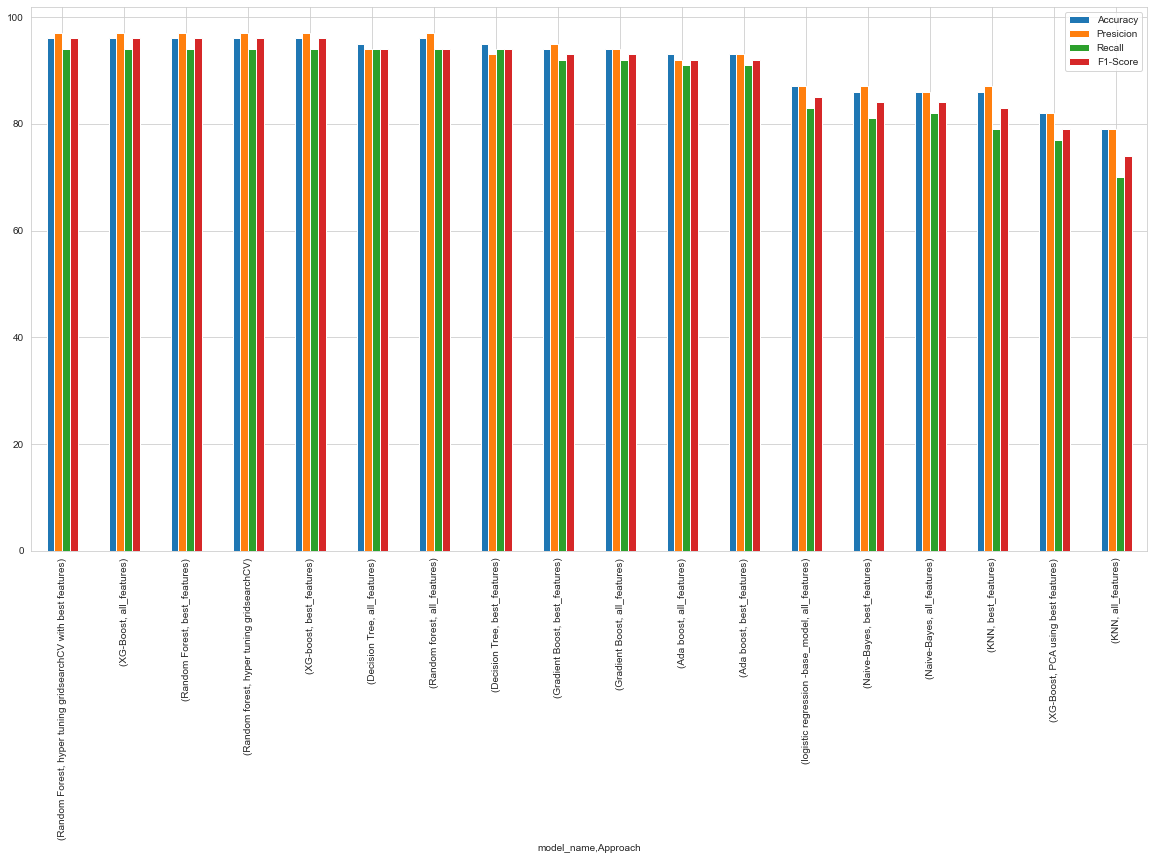

In [292]:
graph.plot(kind = 'bar',figsize = (20,10))

In [379]:
results

,model_name,Approach,Accuracy,Presicion,Recall,F1-Score
0,logistic regression -base_model,all_features,87,87,83,85
1,Naive-Bayes,all_features,86,86,82,84
2,KNN,all_features,79,79,70,74
3,Decision Tree,all_features,95,94,94,94
4,Random forest,all_features,96,97,94,94
5,Ada boost,all_features,93,92,91,92
6,Gradient Boost,all_features,94,94,92,93
7,XG-Boost,all_features,96,97,94,96
8,Random Forest,best_features,96,97,94,96
9,Naive-Bayes,best_features,86,87,81,84
